##### בס"ד

# Data analysis of a database of vehicle license numbers

# load data

In [1]:
import pandas as pd
import csv

list = []
with open('cars.csv', 'r', encoding='ANSI') as file:
    reader = csv.reader(file)
    for row in reader:
        list.append(row[0].split("|"))
        
        
df = pd.DataFrame(list[1:],columns=list[0])

# The arrangement of the data

In [2]:
columns = df.columns
for col in columns:
    df[col] = pd.Series(df[col]).str.replace('"', '')

In [3]:
df.head(1)

,mispar_rechev,tozeret_cd,sug_degem,tozeret_nm,degem_cd,degem_nm,ramat_gimur,ramat_eivzur_betihuty,kvutzat_zihum,shnat_yitzur,...,baalut,misgeret,tzeva_cd,tzeva_rechev,zmig_kidmi,zmig_ahori,sug_delek_nm,horaat_rishum,moed_aliya_lakvish,kinuy_mishari
0,01000039,0152,P,מרצדס בנץ הונג,0054,117.343,URBAN,1,13,2017,...,סוחר,WDD1173431N359671,80,שנהב לבן,225/40R18,225/40R18,בנזין,160323,2017-1,CLA 200


In [4]:
df = df.rename(columns={'tzeva_rechev': 'color'})

# car color

In [5]:
# קבלת תוצאות value_counts לעמודה 'color' ושמירה במשתנה
value_counts = df['color'].value_counts()

# חישוב אחוזים על פי הכמות הכוללת
percentages = value_counts / value_counts.sum() * 100
percentages = round(percentages, 2)

In [6]:
# הוספת עמודה נוספת של אחוזים לתוצאות
car_color = pd.concat([value_counts, percentages], axis=1)
car_color.columns = ['count', 'percentage']

In [7]:
# לאחד שמות דומים
list_color = ["כסף",'אפור','שחור','ירוק','אדום',"כחול","זהב","סגול","לבן"
              ,"חום","ירקרק","כסוף","צהוב","טורקיז","תכלת","בורדו","בז"]
for col in car_color.index:
    car_color = car_color.rename(index=lambda idx: col if col in idx else idx)
    
car_color = car_color.rename(index={'ירקרק': 'ירוק'})                      
car_color = car_color.rename(index=lambda idx: 'אדום' if 'אדמדם' in idx else idx)
car_color = car_color.rename(index=lambda idx: 'זהב' if 'זהוב' in idx else idx)
car_color = car_color.rename(index=lambda idx: 'כסף' if 'כסוף' in idx else idx)
car_color = car_color.rename(index=lambda idx: 'לבן' if 'שנהב' in idx else idx)

car_color = car_color.reset_index(drop=False)
car_color = car_color.groupby('index')["count","percentage"].sum()

C:\Users\dudi9\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [8]:
for index, row in car_color.iterrows():
    # כאן ניתן לבצע פעולות על השורה הנוכחית
    if row['percentage'] < 1.0:
        car_color = car_color.rename(index = {index :'אחר'})  
        
car_color = car_color.groupby('index')["count","percentage"].sum()        
car_color = car_color.sort_values(by="count", ascending=False)
car_color

C:\Users\dudi9\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,count,percentage
index,,
לבן,1418951,37.72
כסף,740826,19.69
אפור,564926,15.00
שחור,446232,11.86
אחר,208505,5.48
כחול,158359,4.21
בז,81822,2.17
אדום,74822,1.99
תכלת,67817,1.81


In [9]:
car_color_name = []

for name in car_color.index:
    car_color_name.append(name[::-1])

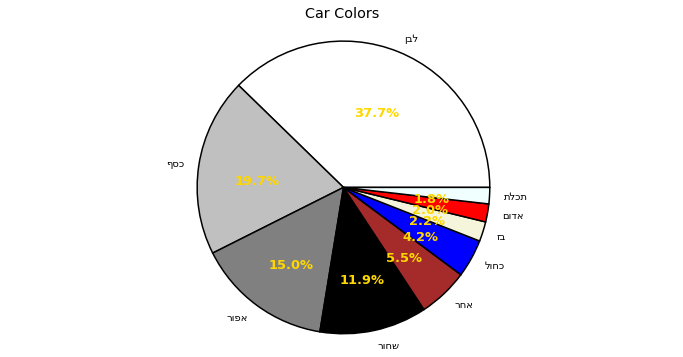

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

colors = ['white', 'silver', 'gray', 'black','brown','blue','beige','red',"azure",'purple',
          'brown', 'lightgreen']

fig, ax = plt.subplots(figsize=(12, 6))
patches, texts, autotexts = ax.pie(car_color["count"], labels=car_color_name, autopct='%1.1f%%',
                            colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

for autotext in autotexts:
    autotext.set_color('gold')
    autotext.set_size(12)
    autotext.set_weight('bold')
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('top')
    
plt.setp(autotexts, size=13)#, weight="bold"
ax.axis('equal')
ax.set_title("Car Colors")

plt.show()